## Population Growth Model
The following data were obtained for the growth of a sheep population introduced into a
new environment on the island of Tasmania (adapted from J. Davidson, ‘‘On the Growth
of the Sheep Population in Tasmania,’’ Trans. R. Soc. S. Australia 62(1938): 342–346).




In [3]:
from tabulate import tabulate
table=[['t(year)',1814,1824,1834,1844,1854,1864],['P(t)',125,275,830,1200,1750,1650]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤════════╤════════╤════════╤════════╤════════╤════════╕
│ t(year)   │   1814 │   1824 │   1834 │   1844 │   1854 │   1864 │
╞═══════════╪════════╪════════╪════════╪════════╪════════╪════════╡
│ P(t)      │    125 │    275 │    830 │   1200 │   1750 │   1650 │
╘═══════════╧════════╧════════╧════════╧════════╧════════╧════════╛


a. Make an estimate of M by graphing P(t)

b. Plot ln(P/(M-P) against t. If a logistic curve seems reasonable, estimate rM  and t*

log(popn/(max-popn)= [-2.57108435 -1.68639895 -0.11375889  0.76214005  5.16478597  2.7080502 ]
slope(rM) of a line is 1.3664321844440313
t* is 2.979943206517844


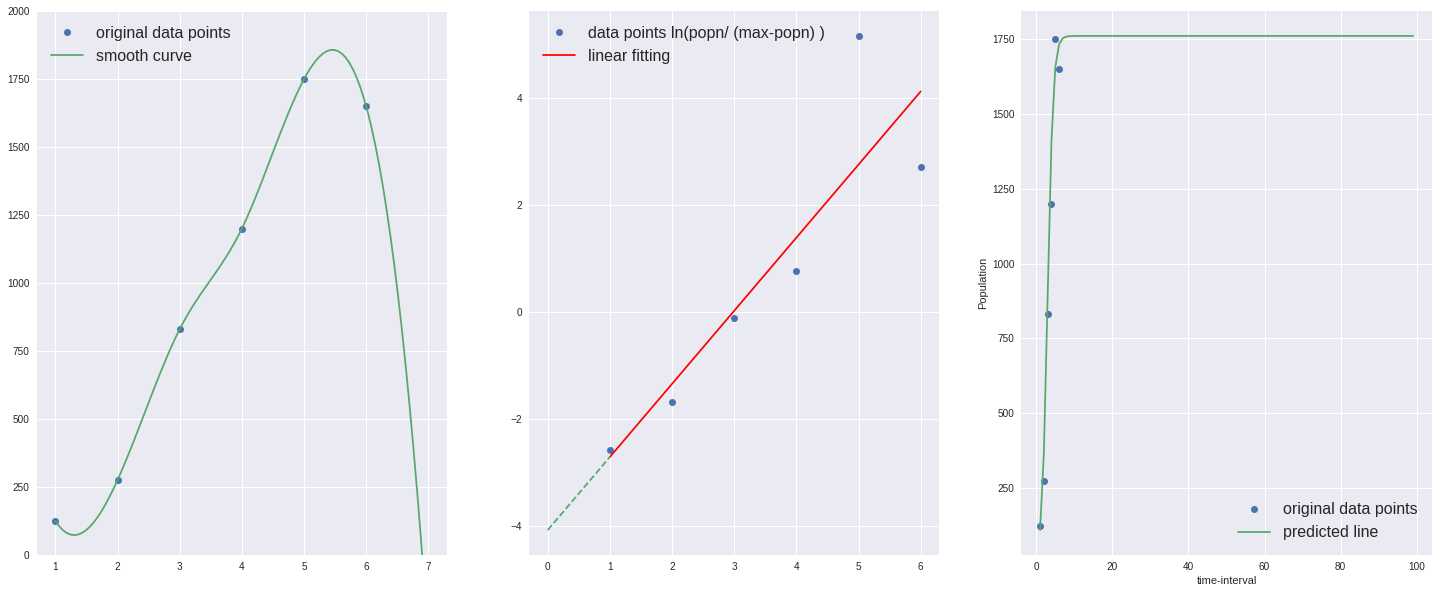

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
#datasets
xe=np.arange(1,100) 
x=np.arange(1,7)  
xt=np.arange(0,2)
max=1760 #from graph [ax[0].plot(x,popn,'o') and ax[0].plot(xs,ys,'-')]
popn=np.array([125,275,830,1200,1750,1650])
smooth_curve =make_interp_spline(x, popn)
xs=np.linspace(1,7,100)
ys=smooth_curve(xs)
y = np.log(popn/(max-popn))
print("log(popn/(max-popn)=",y)
a = (6*np.sum(x*y)-np.sum(x) * np.sum(y)) /(6* np.sum(x**2)-(np.sum(x))**2)
b = (np.sum(x**2)*np.sum(y)-np.sum(x*y)*np.sum(x))/(6*np.sum(x**2)-(np.sum(x))**2)
#print(b)
y_est= a*x+b   #predicted y-value
slope=(y_est[2]-y_est[1])/(x[2]-x[1])
print('slope(rM) of a line is' ,slope)
t_star= -b/slope #t* denote the time when the population P reaches half the limiting value
print( 't* is', t_star)
p_t=1/(1+np.exp(-slope*(xe-t_star))) #logistic growth model
#print(p_t)
yyy=a*xt+b
#print(y,y_est)
plt.style.use('seaborn')
fig,ax=plt.subplots(1,3, figsize = (25,10))
# smooth curve to original data points
ax[0].plot(x,popn,'o',label='original data points')
ax[0].plot(xs,ys,'-',label='smooth curve ')
ax[0].set_ylim([0,2000])
ax[0].legend(loc='upper left',fontsize =16)
#linear fitting  to the data points of ln(popn/ (max-popn) )
ax[1].plot(x,y,'o',label='data points ln(popn/ (max-popn) )')
ax[1].plot(x, y_est,'-r',label= 'linear fitting')
ax[1].plot(xt,yyy,'--')
ax[1].legend(fontsize =16)
#fitting a logistic model to the data 
ax[2].plot(x,popn,'o',label= 'original data points')
ax[2].plot(xe,p_t,'-',label='predicted line')
ax[2].legend(fontsize =16)
ax[2].set_xlabel('time-interval')
ax[2].set_ylabel('Population')
plt.show()